In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# load data into pandas dataframe
data = pd.read_csv("E:\Innomatics_internship\Tasks\Task_11\scores_data.csv")



In [3]:
data.head(5)

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
data.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [7]:
data.columns = data.columns.str.strip()

In [12]:
data.Batch.unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [13]:
data.Score.unique()

array(['6 / 7', '7 / 7', '4 / 7', '5 / 7', '3 / 7', '2 / 7', '0 / 7',
       '1 / 7'], dtype=object)

In [14]:
data['Score'] = data['Score'].str.replace(' / 7', '')
data['Score'] = data['Score'].astype('int')

In [18]:
batch1 = data[data.Batch=='AI_ELITE_4']
batch2 = data[data.Batch=='AI_ELITE_6']
batch3 = data[data.Batch=='AI_ELITE_7']

In [26]:
batch_summary = data.groupby('Batch')['Score'].describe()

# Print the summary statistics for each batch
print(batch_summary)



            count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


In [27]:
# Find the highest and lowest scores in each batch
for batch in batch_summary.index:
    min_score = batch_summary.loc[batch, 'min']
    max_score = batch_summary.loc[batch, 'max']
    print(f"Highest score in {batch}: {max_score}")
    print(f"Lowest score in {batch}: {min_score}")

Highest score in AI_ELITE_4: 7.0
Lowest score in AI_ELITE_4: 0.0
Highest score in AI_ELITE_6: 7.0
Lowest score in AI_ELITE_6: 0.0
Highest score in AI_ELITE_7: 7.0
Lowest score in AI_ELITE_7: 2.0


C:\Users\aditi\AppData\Local\Temp\ipykernel_17648\2356131502.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = grouped_data.mean()["Score"]


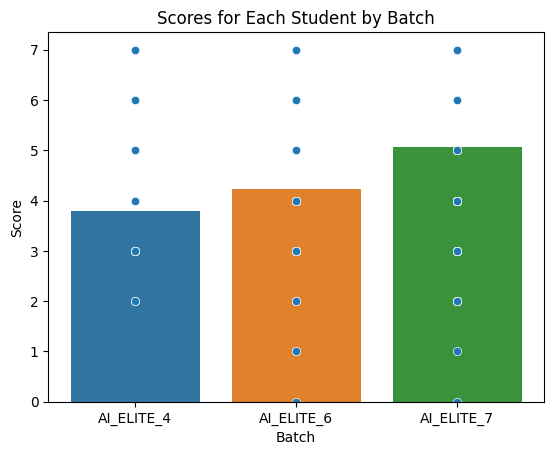

In [34]:
import seaborn as sns
# Group the data by batch
grouped_data = data.groupby("Batch")

# Calculate the mean score for each batch
mean_scores = grouped_data.mean()["Score"]
# Create a bar chart of the mean scores
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title("Mean Scores by Batch")
plt.xlabel("Batch")
plt.ylabel("Mean Score")

# Create a scatter plot of the individual scores
sns.scatterplot(x=data["Batch"], y=data["Score"])
plt.title("Scores for Each Student by Batch")
plt.xlabel("Batch")
plt.ylabel("Score")

plt.show()

In [40]:
high_score1 = batch1[batch1.Score >= 6]
print("User having high score in AI_ELITE_4: ",high_score1.User_ID.count())

User having high score in AI_ELITE_4 4


In [42]:
high_score2 = batch2[batch2.Score >= 6]
print("User having high score in AI_ELITE_6: ",high_score2.User_ID.count())

User having high score in AI_ELITE_6:  9


In [43]:
high_score3 = batch3[batch3.Score >= 6]
print("User having high score in AI_ELITE_7: ",high_score3.User_ID.count())

User having high score in AI_ELITE_7:  23


In [46]:
low_score1 = batch1[batch1.Score <= 2]
print("User having low score in AI_ELITE_4: ",low_score1.User_ID.count())

User having low score in AI_ELITE_4:  9


In [47]:
low_score2 = batch2[batch2.Score <=2]
print("User having low score in AI_ELITE_6: ",low_score2.User_ID.count())

User having low score in AI_ELITE_6:  6


In [48]:
low_score3 = batch3[batch3.Score <=2]
print("User having low score in AI_ELITE_7: ",low_score3.User_ID.count())

User having low score in AI_ELITE_7:  2
